## Modelling long-term and short-term memory using an attractor neural network with triple-well connections

In https://www.biorxiv.org/content/10.1101/2023.07.17.549266v1, the authors consider a model whose weights not only get updated at discrete learning episodes but also continuously evolve in time following the gradient of a double-well potential. Inspired by this idea, we consider a Hopfield model, whose weights evolve on a smooth potential with three distinct minima (and two local maxima) located at the specified values of the couplings (positive, negative and zero). This model is more realistic than the double-well model because, in the double-well model, every neuron eventually has finite connection strength to any other neuron even in the absence of stimulation (this is avoided by removing some of the connections artificially), whereas, in our model, the unstimulated neurons tend to get disconnected in some ranges of the parameters.

Furthermore, this simple system exhibits two types of memory: short-term memory (STM) and long-term memory (LTM). The STM occurs when the weights are within the attraction basin of w=0 (i.e. "within 0-well"), thus, in the absence of external stimulation and noise, such weights converge to zero after some deterministic time. If this is not the case, and the weights are within the non-zero wells, the memories of the unstimulated network may persist indefinitely, degrading only due to noise. Just like real memories, the memories of this model may transition from the STM to LTM, given enough stimulation.

The basic Python implementation of the model is below, and some project ideas can be found at the end of the notebook.

My email is o.senkevich@ulster.ac.uk

#### Importing the modules, preparing the data, initialising the weight matrix with zeros

In [1]:
import matplotlib
matplotlib.rcParams['font.family']='serif'
matplotlib.rcParams['mathtext.fontset']='cm'
import numpy as np
import matplotlib.pyplot as plt
import random


# initialise weight matrix
dim = 25
num_neurons = dim**2

W = np.zeros([num_neurons, num_neurons])

# load data
train_images = np.genfromtxt('./data/25x25/2_5_combined', delimiter=',')

#### Visualising the images aranging the nodes in 2-D array

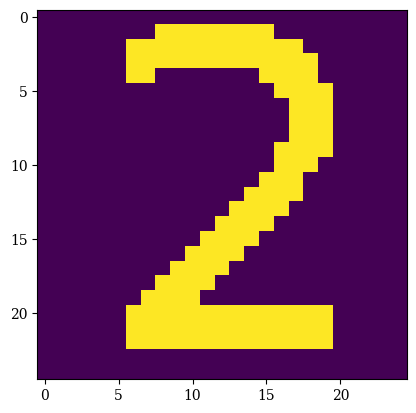

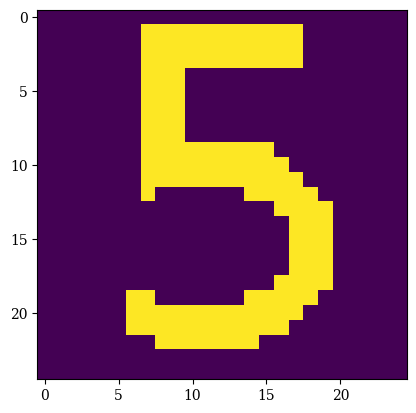

In [2]:
# train image 0
x = np.copy(train_images[0])
plt.imshow(np.reshape(x,(dim,dim)))
plt.show()
# train image 1
x = np.copy(train_images[1])
plt.imshow(np.reshape(x,(dim,dim)))
plt.show()

#### Defining the potential
- Setting the potential smoothly with the 6-th degree polynomial with only the even terms present. In this case, we can compute the position and the depths of all minima => we can set the parameters {a2, a4, a6} to match the desired shape of the potential.

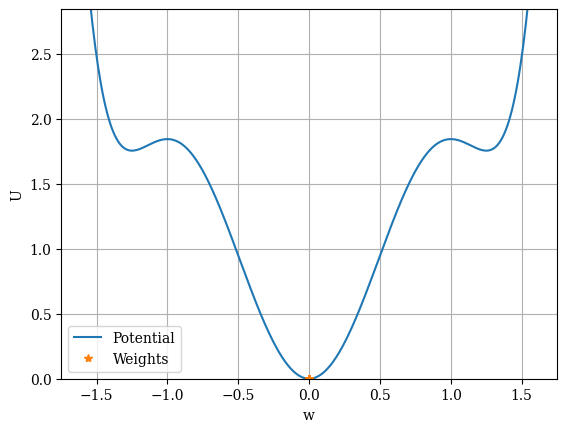

In [3]:
# Setting the parameters
# a2, a4, a6 = 5, -5, 1

Jm, Jp = 1, 1.25 # Distance to the outer minimum and maximum

a6 = 1
a2, a4 = 3*Jp**2*Jm**2*a6 , -3/2*(Jp**2+Jm**2)*a6

def U(J):
    return a2*J**2 + a4*J**4 + a6*J**6

def grad_U(J):
    return 2*a2*J + 4*a4*J**3 + 6*a6*J**5

def plot_potential_and_weights():
    J = np.arange(-Jp-.5, Jp+.5, .01)
    plt.plot(J, U(J), label="Potential")
    plt.plot(W.flatten(), U(W.flatten()), linestyle='none', marker='*', label="Weights")
    plt.xlim([-Jp-.5, Jp+.5])
    plt.ylim([min([U(Jp)-1, U(0)]), U(Jm)+1])
    plt.xlabel('w')
    plt.ylabel('U')
    plt.grid()
    plt.legend(loc=3)
    plt.show()

plot_potential_and_weights()

### Defining learning dynamics

In [4]:
Hebb_rate, relax_rate = .15, .05 # Hebbian learning and relaxation rates
noise_factor = .01 # Factor that regulates the magnitude of white noise in synapses

def present_pattern(pattern):
    ''' Receives a pattern and performs a step of Hebbian learning '''
    for i in range(num_neurons):
        for j in range(i+1, num_neurons):
            W[i,j] += Hebb_rate*pattern[i]*pattern[j]
            W[j,i] = W[i,j]

def evolve(t_start, t_end, dt):
    '''
    Evolves the weights between the pattern presentations
    from t_start to t_end with time step dt
    '''
    for t in np.arange(t_start, t_end, dt):
        for i in range(num_neurons):
            for j in range(i+1, num_neurons):
                W[i,j] -= (relax_rate*grad_U(W[i,j]) + noise_factor*np.random.normal())*dt
                W[j,i] = W[i,j]

#### Defining presentation sequence

In [5]:
presentation_times = np.arange(0, 2.2, .2) # Times at which to present the patterns
presentation_sequence = []

for t in presentation_times:
  # presentation_sequence is the list of [presentation_time, index of the training pattern]
  presentation_sequence.append([t, np.random.choice([0,1])])


#### Simulating the dynamics

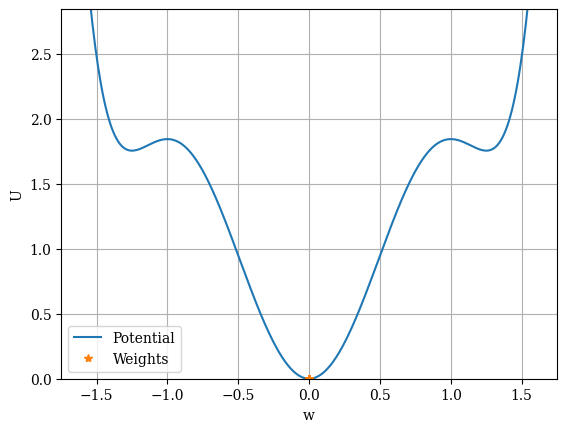

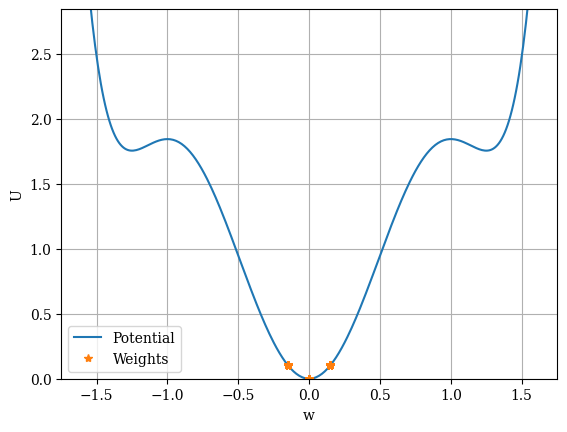

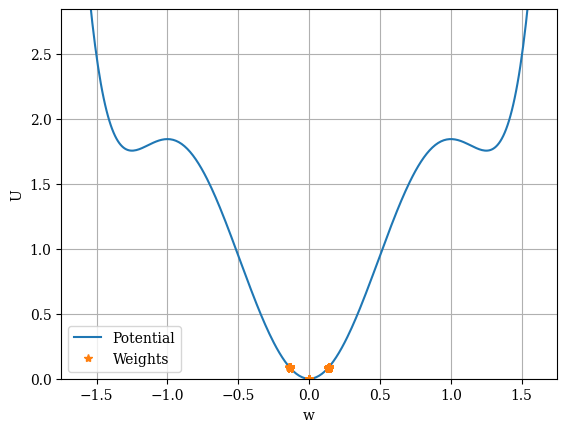

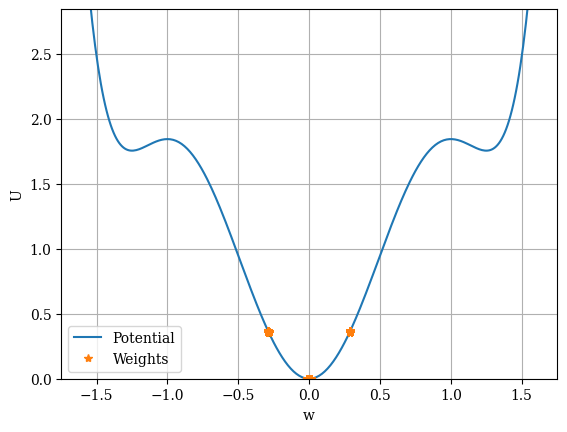

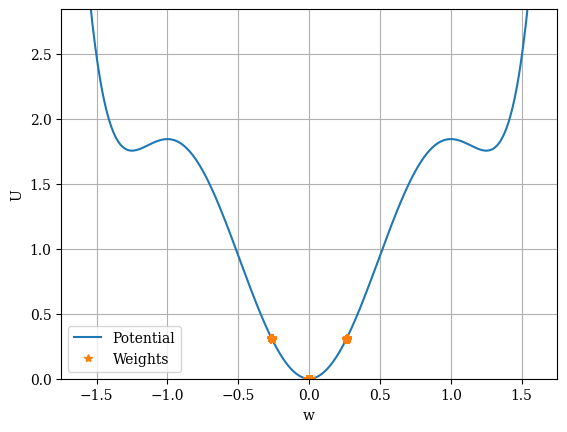

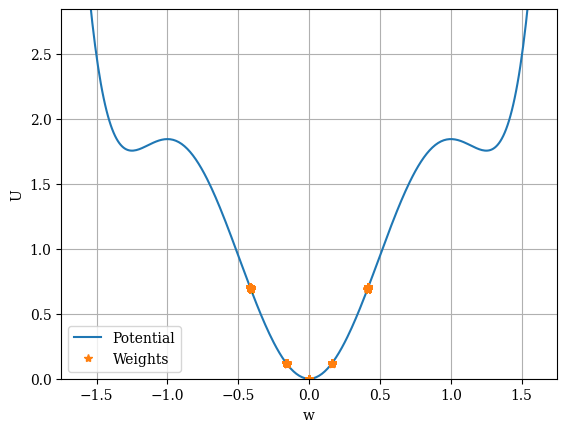

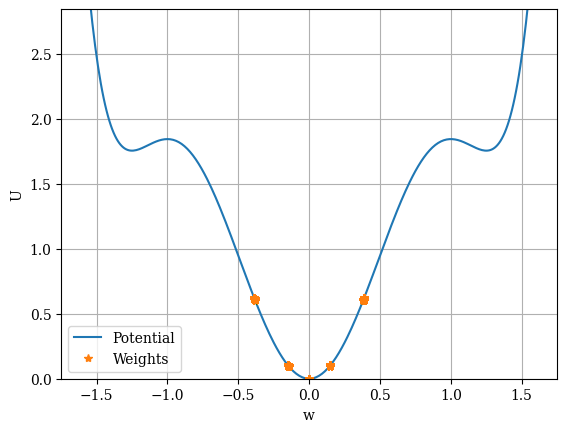

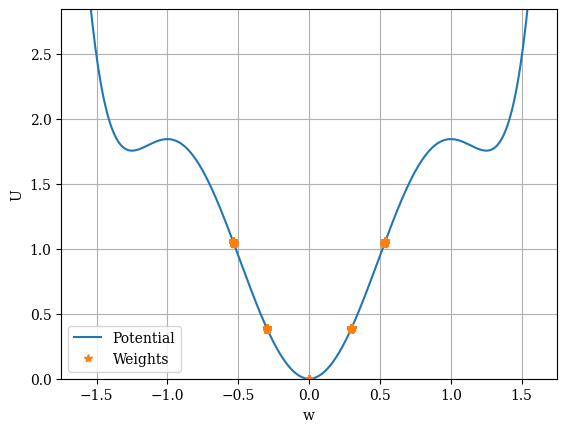

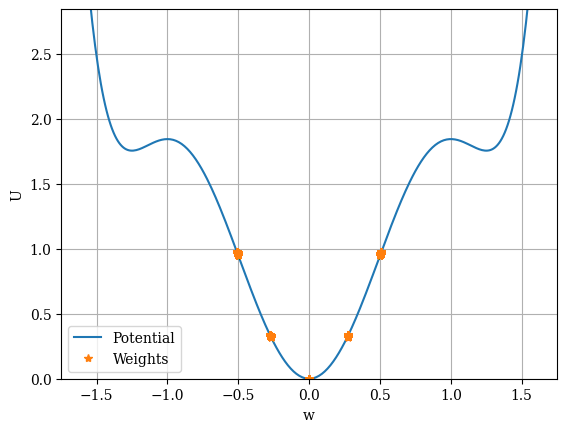

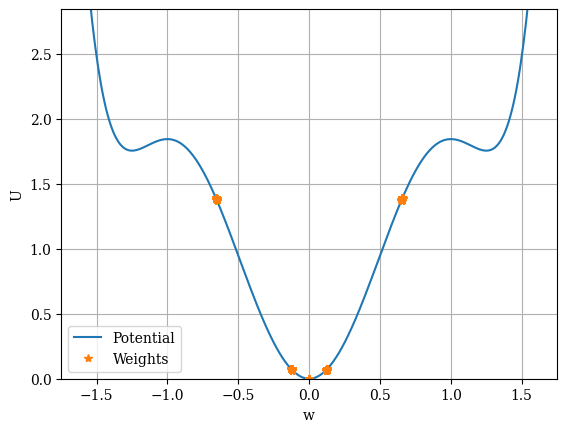

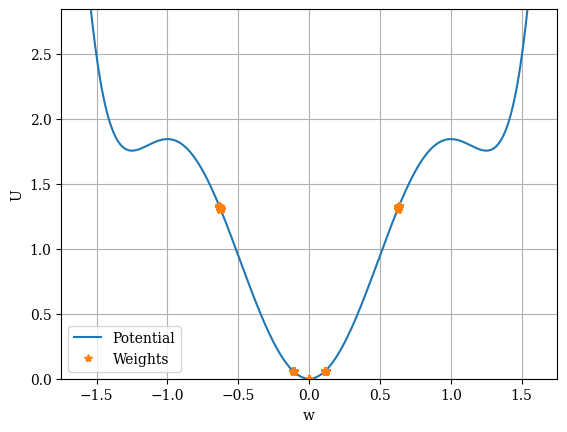

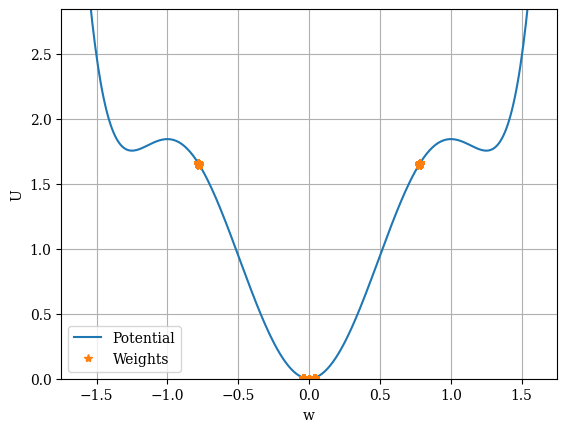

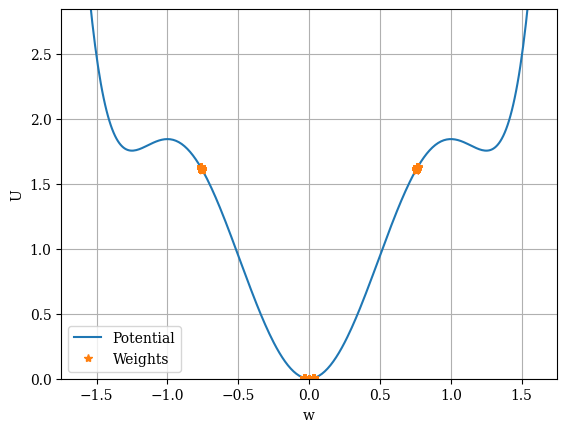

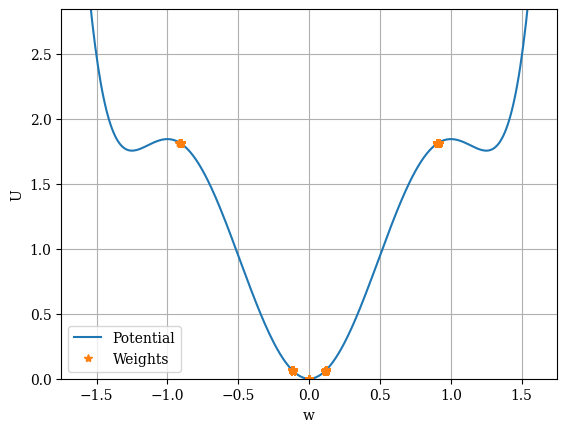

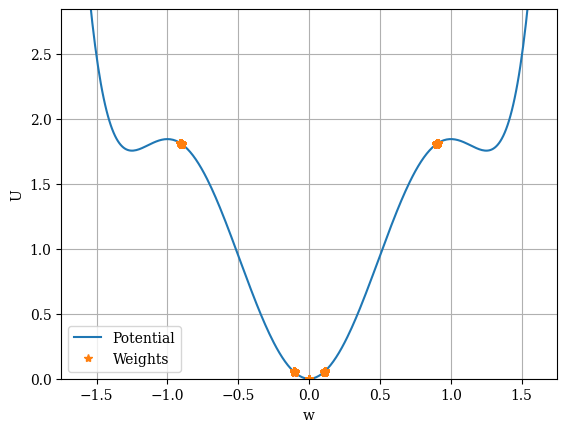

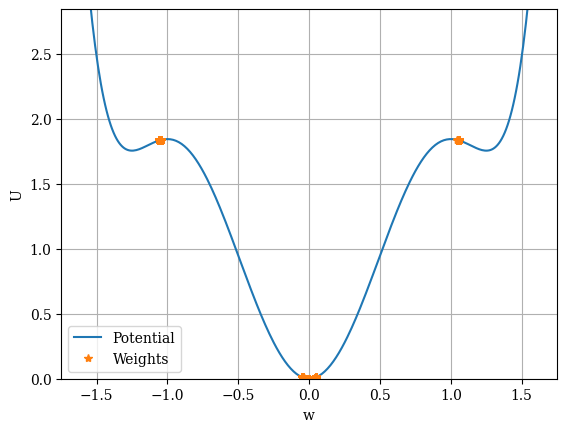

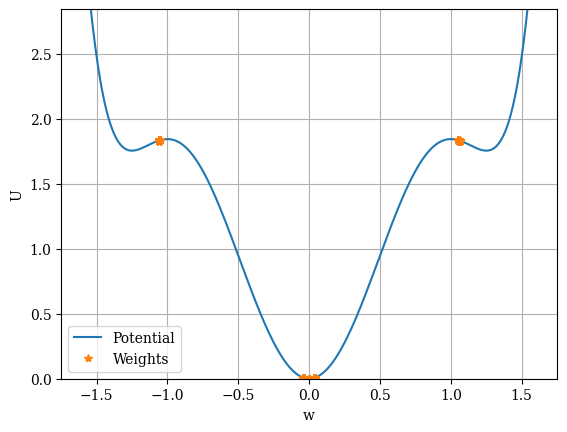

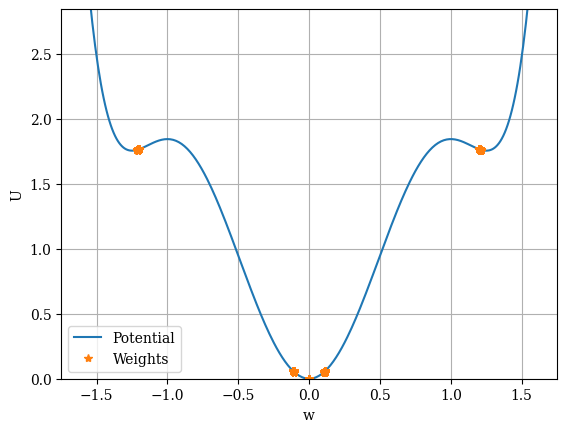

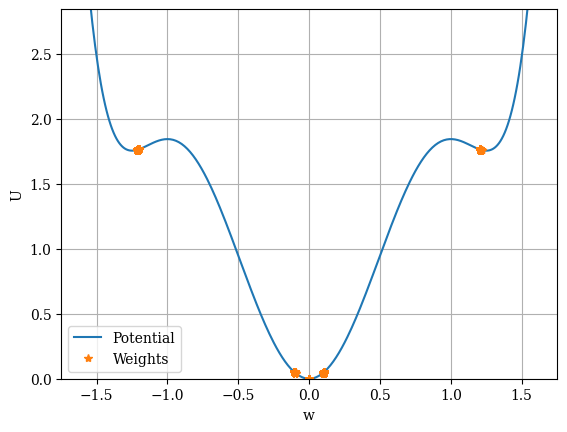

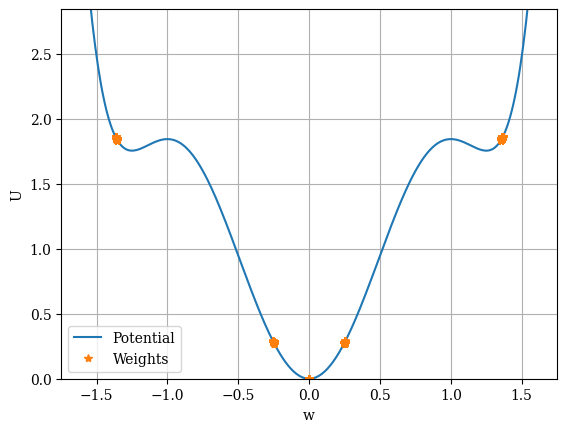

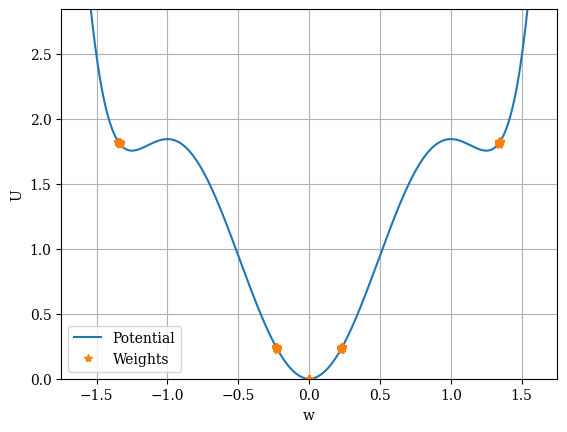

In [6]:
plot_potential_and_weights()

for le, le_next in zip(presentation_sequence[:-1], presentation_sequence[1:]) : # le stands for "learning episode"
  present_pattern(train_images[le[1]])
  plot_potential_and_weights()
  evolve(t_start=le[0], t_end=le_next[0], dt=.01)
  plot_potential_and_weights()

#### Creating animation (optional)

Simulation time interval between the video frames:  0.010100000000000008
Simulation time =  0.01
current_frame: 1.0
Simulation time =  0.02
current_frame: 2.0
Simulation time =  0.03
current_frame: 3.0
Simulation time =  0.04
current_frame: 4.0
Simulation time =  0.05
current_frame: 5.0
Simulation time =  0.060000000000000005
current_frame: 6.0
Simulation time =  0.07
current_frame: 7.0
Simulation time =  0.08
current_frame: 8.0
Simulation time =  0.09
current_frame: 9.0
Simulation time =  0.09999999999999999
current_frame: 10.0
Simulation time =  0.10999999999999999
current_frame: 11.0
Simulation time =  0.11999999999999998
current_frame: 12.0
Simulation time =  0.12999999999999998
current_frame: 13.0
Simulation time =  0.13999999999999999
current_frame: 14.0
Simulation time =  0.15
current_frame: 15.0
Simulation time =  0.16
current_frame: 16.0
Simulation time =  0.17
current_frame: 17.0
Simulation time =  0.18000000000000002
current_frame: 18.0
Simulation time =  0.19000000000000003

current_frame: 142.0
Simulation time =  1.440000000000001
current_frame: 143.0
Simulation time =  1.450000000000001
current_frame: 144.0
Simulation time =  1.460000000000001
current_frame: 145.0
Simulation time =  1.470000000000001
current_frame: 146.0
Simulation time =  1.480000000000001
current_frame: 147.0
Simulation time =  1.490000000000001
current_frame: 148.0
Simulation time =  1.500000000000001
current_frame: 149.0
Simulation time =  1.5100000000000011
current_frame: 150.0
Simulation time =  1.5200000000000011
current_frame: 151.0
Simulation time =  1.5300000000000011
current_frame: 152.0
Simulation time =  1.5400000000000011
current_frame: 153.0
Simulation time =  1.5500000000000012
current_frame: 154.0
Simulation time =  1.5600000000000012
current_frame: 155.0
Simulation time =  1.5700000000000012
current_frame: 156.0
Simulation time =  1.5800000000000012
current_frame: 157.0
Simulation time =  1.5900000000000012
current_frame: 158.0
Simulation time =  1.6000000000000012
curr

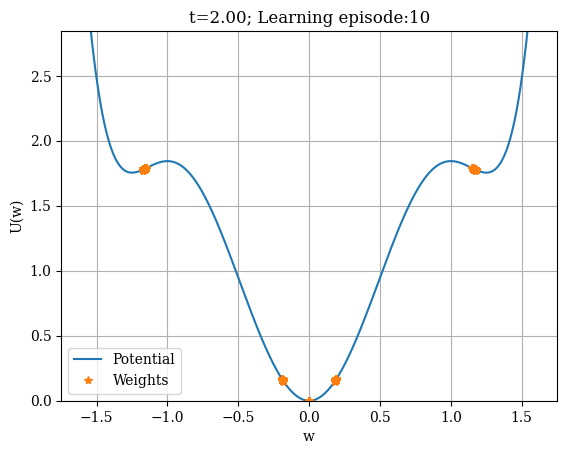

In [8]:
import matplotlib.animation as manimation

W = np.zeros([num_neurons, num_neurons])

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title="Weights' dynamics", artist='CN3 Autumn School',
                comment='Dynamics of weights on a triple-well potential with Hebbian learning')
writer = FFMpegWriter(fps=7, metadata=metadata)

fig = plt.figure()

J = np.arange(-Jp-.5, Jp+.5, .01)
plt.plot(J, U(J), label="Potential")
weights_plot, = plt.plot([], [], linestyle='none', marker='*', label="Weights")
plt.xlim([-Jp-.5, Jp+.5])
plt.ylim([min([U(Jp)-1, U(0)]), U(Jm)+1])
plt.xlabel('w')
plt.ylabel('U(w)')
plt.grid()
plt.legend(loc=3)

Dts = (presentation_times[1:]-presentation_times[:-1])/20
Dt = max(Dts) * 1.01 # Time interval between the frames
print("Simulation time interval between the video frames: ", Dt)
sim_time, current_frame = 0, 0

with writer.saving(fig, "weight_dynamics.mp4", 200):
    for pn in range(len(presentation_times)-1):
        present_pattern(train_images[presentation_sequence[pn][1]])
        plt.title("t=" + "{:.2f}".format(sim_time) + "; Learning episode:" + str(pn+1))
        weights_plot.set_data(W.flatten(), U(W.flatten()))
        writer.grab_frame()
        for t in np.arange(presentation_times[pn], presentation_times[pn+1], Dts[pn]):
            evolve(t, t+Dts[pn], dt=.01)
            sim_time += Dts[pn]
            if sim_time // Dt > current_frame:
                weights_plot.set_data(W.flatten(), U(W.flatten()))
                plt.title("t=" + "{:.2f}".format(sim_time) + "; Learning episode:" + str(pn+1))
                writer.grab_frame()
                current_frame = sim_time//Dt
                print("current_frame:", current_frame)
            print("Simulation time = ", sim_time)#, end='\r')

##### The next cell will insert the video into the notebook

In [9]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('weight_dynamics.mp4','rb').read()
data_url = "data:weight_dynamics/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1000 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

### Defining the Hopfield update rule

In [10]:
# function for updating state asynchronously
def updateState():
    ind = random.choice(range(num_neurons))
    total_input = np.dot(W[ind,:],x)
    if total_input>=0:
        x[ind] = 1
    else:
        x[ind] = -1

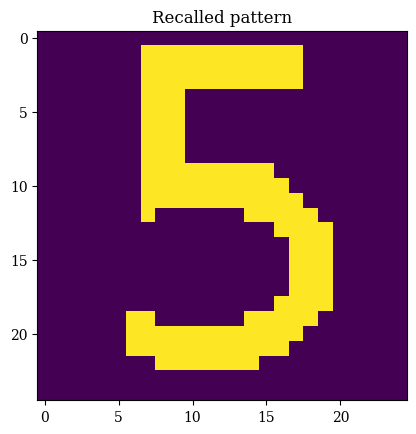

In [12]:
def corrupt_pattern(pattern, flip_prob = .1):
    ''' Adds noise the pattern with the probability of flipping the node flip '''
    for i in range(num_neurons):
        if np.random.choice([True, False], p=(flip_prob, 1-flip_prob)):
            pattern[i] = -pattern[i]
    return pattern

x = corrupt_pattern(np.copy(train_images[1]), flip_prob=.1)

for i in range(10000):
    updateState()

plt.title("Recalled pattern")
plt.imshow(np.reshape(x,(dim,dim)))
plt.show()

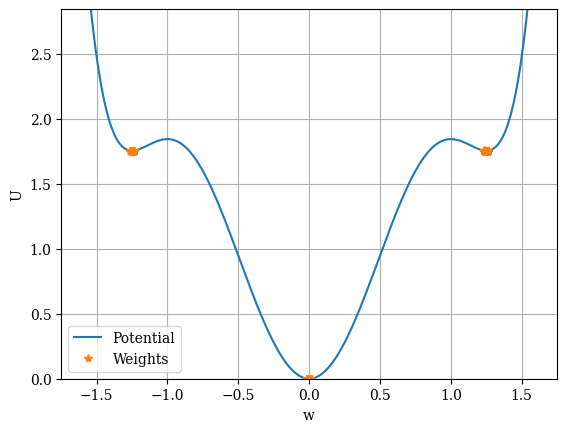

In [13]:
evolve(t_start=0, t_end=10, dt=.1)
plot_potential_and_weights()

In [ ]:
x = corrupt_pattern(np.copy(train_images[0]), flip_prob=.1)

for i in range(10000):
    updateState()

plt.title("Recalled pattern")
plt.imshow(np.reshape(x,(dim,dim)))
plt.show()

## Project ideas

#### Project_1: Dependence of the memories on the delay between pattern presentations

It turns out that when the learning rate of the model is sufficiently low, the attractors of the network and their temporal evolution largely depend on the delay between the learning episodes (presentations of the patterns). Can you see why? For the given learning and relaxation rates, the shape of the potential and the noise factor, what is the time between image presentations after which the quality of the recovered patterns drops to 50% on average? How does this effect depend on the probability of a given neuron being active in a training pattern (aka sparsity or coding level of the input)?

#### Project_2: Influence of the long-term memory (LTM) on the short-term memory (STM)

Engagement of the long-term memory (LTM) should impair short-term memory (STM) performance due to the domination of the large LTM weights over the relatively small STM weights. Indeed, if the LTM is empty, the recovery of a single STM pattern is only limited by the weights' noise, which is assumed to be relatively small. However, if the LTM is not empty, the STM weights should be comparable with the LTM weights for the STM patterns to be recovered. This should dramatically increase the speed of forgetting, and the operation of the STM would only be possible under certain conditions. Find these conditions if they exist for dense and sparse patterns.

#### Project_3: Long-term memory decay caused by subthreshold learning and noise

If the depth of the outer wells is sufficiently small compared to the depth of the central well, presenting more patterns that do not make their way to the long-term memory (subthreshold learning) should still degrade the LTM memories. Can you see why? Can you verify that with simulations? Can this decay be somehow distinguished from the decay caused by noise?

#### Project_4: Stochastic resonance

The Hopfield model dynamics only depend on the ratios of weights; therefore, if the weights are noiseless, even the STM patterns can persist for a very long time (assuming the LTM is empty). Can you see why? However, it is unrealistic to assume noiseless connections, and adding some noise is expected to reduce the longevity of the memories. While this is true for the STM only (i.e., the palimpsest model), in our triple-well model, the noise may facilitate the transitions of the STM to LTM, implying nonuniform dependence of the memory longevity on the noise level.  Find the dependence of the memory lifetime on the noise level and see if this is indeed the case.

#### Project_5: Total memory capacity

Find out how many memories can be simultaneously loaded into the LTM of the network. Does the sparsity (codding level) of the input make any difference? Compare the results with that of the model with binary weights [REFERENCE].

#### Project_6: Asymmetric potential

Explore the model's behaviour when the potential becomes asymmetric, e.g. when a linear term is added to the potential.

#### Project_7: Heterogeneous connections

What will happen if the potential is not the same for all couplings, but has some variability insted?
